In [ ]:
pip install pandas numpy librosa matplotlib seaborn scikit-learn keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np

import os
import sys


import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from IPython.display import Audio

import keras


import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 1.LOADING AND COMBINING DIFFERENT DATASET

In [ ]:
# RAVDESS

Ravdess = "dataset/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

# CREMA-D

Crema = "dataset/cremad/AudioWAV/"

# TESS

Tess = "dataset/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"

# SAVEE

Savee = "dataset/surrey-audiovisual-expressed-emotion-savee/ALL/"

## LOADING RAVDESS DATASET

<!-- 1. EXTRACTING DIFFERENT DATA AND COMBINING INTO ONE -->

<!-- 1. COMBINING DIFFERENT DATASETS INTO ONE -->

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
1,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
2,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
3,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
4,calm,dataset/ravdess-emotional-speech-audio/audio_s...


## LOADING CREMA DATASET

In [ ]:
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,dataset/cremad/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,dataset/cremad/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,dataset/cremad/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,dataset/cremad/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,dataset/cremad/AudioWAV/1001_DFA_NEU_XX.wav


## LOADING TESS DATASET

In [ ]:
tess_directory_list = os.listdir(Tess)
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0].split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,dataset/toronto-emotional-speech-set-tess/tess...
1,angry,dataset/toronto-emotional-speech-set-tess/tess...
2,angry,dataset/toronto-emotional-speech-set-tess/tess...
3,angry,dataset/toronto-emotional-speech-set-tess/tess...
4,angry,dataset/toronto-emotional-speech-set-tess/tess...


## LOADING SAVEE DATASET

In [ ]:
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,dataset/surrey-audiovisual-expressed-emotion-s...
1,angry,dataset/surrey-audiovisual-expressed-emotion-s...
2,angry,dataset/surrey-audiovisual-expressed-emotion-s...
3,angry,dataset/surrey-audiovisual-expressed-emotion-s...
4,angry,dataset/surrey-audiovisual-expressed-emotion-s...


## COMBINING ALL DATASETS

In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path = data_path[~data_path["Emotions"].isin(["calm", "surprise"])]
data_path.to_csv("data_path.csv", index=False)
data_path.head()

,Emotions,Path
0,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
1,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
2,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
3,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
12,happy,dataset/ravdess-emotional-speech-audio/audio_s...


In [ ]:
# extract w2v2

import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
from joblib import Parallel, delayed
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2Model


CSV_PATH = "data_path.csv"
OUT_DIR  = "w2v2_mean_feats"
N_JOBS   = 4
os.makedirs(OUT_DIR, exist_ok=True)
df       = pd.read_csv(CSV_PATH)
label2id = {l:i for i,l in enumerate(sorted(df.Emotions.unique()))}
df["label_id"] = df.Emotions.map(label2id)


processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
model     = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")
model.eval()

def extract_mean(path):
    wav,_ = librosa.load(path, sr=16_000)
    inp    = processor(wav, sampling_rate=16_000, return_tensors="pt", padding=True)
    with torch.no_grad():
        seq = model(inp.input_values).last_hidden_state.squeeze(0)  # (T,768)
    return seq.mean(dim=0).cpu().numpy()  # (768,)


paths  = df.Path.tolist()
feats  = Parallel(n_jobs=N_JOBS, backend="threading")(
    delayed(extract_mean)(p) for p in tqdm(paths, desc="Extracting")
)
labels = df.label_id.values
np.savez(
    os.path.join(OUT_DIR, "mean_feats_labels.npz"),
    feats = np.stack(feats, axis=0),
    labels=labels
)





Extracting:   0%|          | 0/11318 [00:00<?, ?it/s]

Extracting:   0%|          | 8/11318 [00:00<22:23,  8.42it/s]

Extracting:   0%|          | 12/11318 [00:01<32:07,  5.86it/s]

Extracting:   0%|          | 16/11318 [00:02<39:03,  4.82it/s]

Extracting:   0%|          | 20/11318 [00:04<42:22,  4.44it/s]

Extracting:   0%|          | 24/11318 [00:05<44:19,  4.25it/s]

Extracting:   0%|          | 28/11318 [00:06<46:34,  4.04it/s]

Extracting:   0%|          | 32/11318 [00:07<50:10,  3.75it/s]

Extracting:   0%|          | 36/11318 [00:08<49:30,  3.80it/s]

Extracting:   0%|          | 40/11318 [00:09<54:34,  3.44it/s]

Extracting:   0%|          | 44/11318 [00:11<55:21,  3.39it/s]

Extracting:   0%|          | 48/11318 [00:12<56:44,  3.31it/s]

Extracting:   0%|          | 52/11318 [00:13<58:08,  3.23it/s]

Extracting:   0%|          | 56/11318 [00:14<55:30,  3.38it/s]

Extracting:   1%|          | 60/11318 [00:15<55:47,  3.36it/s]

Extracting:   1%|          | 64/11318 [00:17<58:

✅ Saved mean‐pooled embeddings → w2v2_mean_feats


# ENSEMBLE MODEL

In [ ]:
import time
import numpy  as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics       import accuracy_score, confusion_matrix
import seaborn   as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, backend as K

CSV_PATH    = "data_path.csv"
FEAT_PATH   = "w2v2_mean_feats/mean_feats_labels.npz"
TEST_RATIO  = 0.2
SEED        = 42
BATCH_SIZE  = 32
MFCC_N      = 40
MFCC_FRAMES = 162
EPOCHS      = 30
LR          = 1e-4

tf.random.set_seed(SEED)
np.random.seed(SEED)


df     = pd.read_csv(CSV_PATH)
labels = sorted(df.Emotions.unique())
lbl2i  = {l:i for i,l in enumerate(labels)}
df["label_id"] = df.Emotions.map(lbl2i)

data   = np.load(FEAT_PATH)
X_w2v2 = data["feats"]
y_all  = data["labels"]

# Extracting MFCC
def extract_mfcc(path):
    wav, _ = librosa.load(path, sr=16_000)
    m      = librosa.feature.mfcc(
                 y=wav,
                 sr=16_000,
                 n_mfcc=MFCC_N
             ).T
    if m.shape[0] < MFCC_FRAMES:
        pad = np.zeros((MFCC_FRAMES - m.shape[0], MFCC_N), dtype=np.float32)
        m   = np.vstack([m, pad])
    else:
        m   = m[:MFCC_FRAMES]
    return m.astype(np.float32)


X_mfcc = np.stack([extract_mfcc(p) for p in df.Path], axis=0)


X1_tr, X1_val, X2_tr, X2_val, y_tr, y_val = train_test_split(
    X_mfcc, X_w2v2, y_all,
    test_size=TEST_RATIO, stratify=y_all, random_state=SEED
)

# Combining data features from mfcc and wav2vec2 mean pooling
def make_ds(x1, x2, y, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices(((x1, x2), y))
    if shuffle:
        ds = ds.shuffle(len(x1), seed=SEED)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X1_tr, X2_tr, y_tr, shuffle=True)
val_ds   = make_ds(X1_val, X2_val, y_val, shuffle=False)

# TIM NET MODEL
def build_timnet_trunk():
    def tab(x, d):
        s = x
        y = layers.Conv1D(64,2,dilation_rate=d,padding="causal")(x)
        y = layers.BatchNormalization()(y)
        y = layers.Activation("relu")(y)
        y = layers.SpatialDropout1D(0.1)(y)
        g = layers.Conv1D(64,2,dilation_rate=d,padding="causal")(y)
        g = layers.BatchNormalization()(g)
        g = layers.Activation("relu")(g)
        g = layers.SpatialDropout1D(0.1)(g)
        g = layers.Activation("sigmoid")(g)
        if s.shape[-1] != 64:
            s = layers.Conv1D(64,1,padding="same")(s)
        return layers.Multiply()([s,g])

    inp = layers.Input((MFCC_FRAMES,MFCC_N))
    fwd = layers.Conv1D(64,1,padding="causal")(inp)
    bwd = layers.Conv1D(64,1,padding="causal")(
           layers.Lambda(lambda t:K.reverse(t,1))(inp))
    for i in range(8):
        d   = 2**i
        fwd = tab(fwd, d)
        bwd = tab(bwd, d)
    merged = layers.Add()([fwd,bwd])
    out    = layers.GlobalAveragePooling1D()(merged)
    return models.Model(inp, out, name="timnet_trunk")

timnet_trunk = build_timnet_trunk()

# W2V2 MODEL
w2v2_inp = layers.Input((X_w2v2.shape[1],), name="wv2v2_mean")
w2v2_out = layers.Dense(128, activation="relu")(w2v2_inp)
w2v2_trunk = models.Model(w2v2_inp, w2v2_out, name="w2v2_trunk")

# ENSEMBLING
t1 = timnet_trunk.output   #64
t2 = w2v2_trunk.output     #128
x  = layers.Concatenate()([t1,t2])
x  = layers.Dense(64, activation="relu")(x)
x  = layers.Dropout(0.3)(x)
out= layers.Dense(len(labels), activation="softmax")(x)
ensemble = models.Model([timnet_trunk.input, w2v2_trunk.input], out)

# TRAINING MODEL
ensemble.compile(
    optimizer=tf.keras.optimizers.Adam(LR),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

t0 = time.time()
ensemble.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=[es])
print(f"\n→ Trained in {(time.time()-t0)/60:.1f} min")




Computing MFCCs…
Epoch 1/30


Extracting:   2%|▏         | 183/11318 [50:31<51:14:00, 16.56s/it]


283/283 [==============================] - 165s 524ms/step - loss: 1.7078 - accuracy: 0.2884 - val_loss: 1.5275 - val_accuracy: 0.4112
Epoch 2/30
283/283 [==============================] - 145s 512ms/step - loss: 1.5074 - accuracy: 0.3977 - val_loss: 1.3334 - val_accuracy: 0.5093
Epoch 3/30
283/283 [==============================] - 148s 522ms/step - loss: 1.3758 - accuracy: 0.4632 - val_loss: 1.2209 - val_accuracy: 0.5605
Epoch 4/30
283/283 [==============================] - 150s 532ms/step - loss: 1.2814 - accuracy: 0.5036 - val_loss: 1.1432 - val_accuracy: 0.5804
Epoch 5/30
283/283 [==============================] - 144s 509ms/step - loss: 1.2127 - accuracy: 0.5330 - val_loss: 1.0759 - val_accuracy: 0.6003
Epoch 6/30
283/283 [==============================] - 141s 498ms/step - loss: 1.1554 - accuracy: 0.5643 - val_loss: 1.0377 - val_accuracy: 0.6153
Epoch 7/30
283/283 [==============================] - 139s 493ms/step - loss: 1.1252 - accuracy: 0.5699 - val_loss: 1.0023 - val_accura

ValueError: not enough values to unpack (expected 3, got 2)

# RESULTS

71/71 [==============================] - 7s 92ms/step
Val accuracy: 70.45%


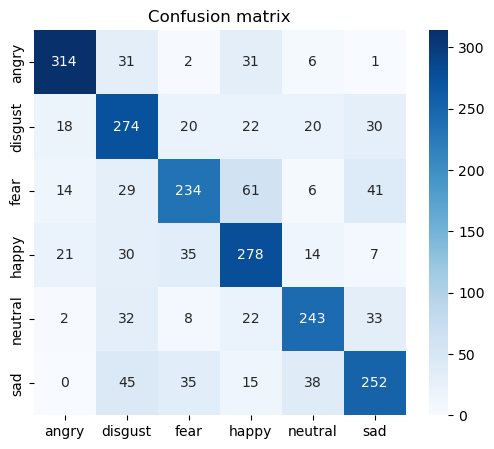

In [ ]:
# RESULT METRICS
y_pred = np.argmax(ensemble.predict(val_ds), axis=1)
y_true = np.concatenate([y_batch.numpy() for (_, _), y_batch in val_ds], axis=0)
print("Val accuracy:", f"{accuracy_score(y_true, y_pred):.2%}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix"); plt.show()